# imports

In [243]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from tensorflow.keras.models import load_model

# constants

In [285]:
MODEL_PATH_1 = '../data/traffic_data_model_4k_imgs_25_epoch.h5'
MODEL_PATH_2 = '../data/traffic_data_model_8k_imgs_25_epoch.h5'
model = load_model(MODEL_PATH_2)
META_CSV = '../data/traffic_data_old/Meta.csv'
META_DATA_PATH = '../data/traffic_data_old'
TEST_IMGS_PATH = '../data/test_imgs/test_img2.jpg'
INPUT_RES = 224

In [286]:
IMG_RES = 1024

[[[250 255 249]
  [249 254 248]
  [249 253 248]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[251 255 250]
  [250 255 249]
  [249 254 248]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[252 255 251]
  [251 255 250]
  [250 255 249]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[255 253 254]
  [255 253 254]
  [255 253 254]
  ...
  [251 253 252]
  [248 250 249]
  [247 249 248]]

 [[255 253 253]
  [254 253 253]
  [254 252 253]
  ...
  [251 253 252]
  [248 250 249]
  [247 249 248]]

 [[254 252 253]
  [254 252 253]
  [254 252 253]
  ...
  [251 253 252]
  [248 250 249]
  [247 249 248]]]
(1024, 1024, 3)


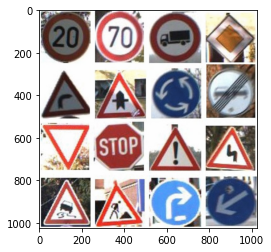

In [287]:
test_img = Image.open(TEST_IMGS_PATH)
test_img = test_img.resize((IMG_RES, IMG_RES))
test_img = np.array(test_img)
print(test_img)

plt.imshow(test_img)
print(test_img.shape)

# loading meta data

In [288]:
%%time
meta_csv_data = pd.read_csv(META_CSV)

meta_data = []  # image data
meta_classIds = []
meta_filenames = []
for ind in meta_csv_data.index:
    img_ = Image.open(META_DATA_PATH + '/' + meta_csv_data.Path[ind])
    img_ = img_.resize((224, 224))
    img_ = np.array(img_)

    meta_data.append(img_)

    meta_classIds.append(meta_csv_data.ClassId[ind])
    meta_filenames.append(meta_csv_data.Path[ind])

CPU times: user 183 ms, sys: 30 ms, total: 213 ms
Wall time: 327 ms


In [289]:
meta_data = np.array(meta_data)

# generating slices

In [296]:
NO_OF_SLICES = 4
SLICE_SIZE = int(IMG_RES / NO_OF_SLICES)
SLICE_DISPLAY_RES = 300

In [297]:
print(SLICE_SIZE)

256


In [298]:
def generateslices(img):
    print(img.shape)

    img_slices = []
    slice_coodinates = []

    for i in range(NO_OF_SLICES):
        for j in range(NO_OF_SLICES):
            slices_ = []
            coods_ = []
            left = i * SLICE_SIZE
            top = j * SLICE_SIZE
            right = left + SLICE_SIZE
            bottom = top + SLICE_SIZE
            array2img = Image.fromarray(img)
            array2img = array2img.crop((left, top, right, bottom))
            array2img = array2img.resize((224, 224))
            print(np.array(array2img).shape)
            slices_.append(array2img)
            coods_.append((left, top, right, bottom))
            img_slices.append(slices_)
            slice_coodinates.append(coods_)
    #
    #
    return img_slices, slice_coodinates

In [299]:
slices, coodinates = generateslices(test_img)

(1024, 1024, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [300]:
def test(slice__):

    slice__ = np.array(slice__)
    print(slice__.shape)
    pred = model.predict(np.array([slice__]))
    # print(pred[1][0])
    pred_coods = pred[0][0]
    pred_label = np.where(pred[1][0] == np.amax(pred[1][0]))[0][0]
    print(pred_label)

    slice__  = slice__ * 255

    x1_ = int(pred_coods[0] * 224)
    y1_ = int(pred_coods[1] * 224)
    x2_ = int(pred_coods[2] * 224)
    y2_ = int(pred_coods[3] * 224)

    slice__ = cv2.rectangle(slice__, pt1=(x1_, y1_), pt2=(x2_, y2_), color=(255, 0, 0), thickness=3)

    plt.subplot(1, 2, 1)
    plt.imshow(slice__)
    plt.title(f"Actual Image slice", fontdict={'fontsize': 'x-large', 'color': 'red', 'fontweight': 'heavy'})

    pred_file_path = list(meta_csv_data[meta_csv_data.ClassId == pred_label].Path)[0]
    pred_img = Image.open(META_DATA_PATH + '/' + pred_file_path)
    pred_img = np.array(pred_img)
    plt.subplot(1, 2, 2)
    plt.imshow(pred_img)
    plt.title("predicted image", fontdict={'fontsize': 'x-large', 'color': 'red', 'fontweight': 'heavy'})
    plt.xlabel(f"class {pred_label}\n{np.amax(pred[1][0]) * 100}", fontdict={'fontsize': 'x-large', 'color': 'red', 'fontweight': 'heavy'})

    print('max prob = ', np.amax(pred[1][0]))
    # print(pred[1][0])
    plt.show()
    return pred_label, pred_coods


(224, 224, 3)
1/1 [==============================] - 0s 366ms/step
0
max prob =  1.0


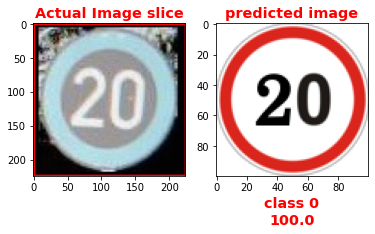

(224, 224, 3)
1/1 [==============================] - 1s 582ms/step
20
max prob =  1.0


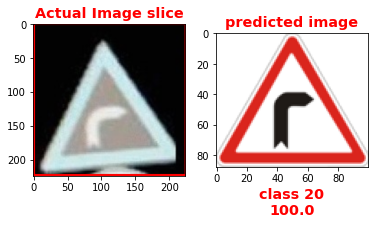

(224, 224, 3)
1/1 [==============================] - 1s 545ms/step
13
max prob =  1.0


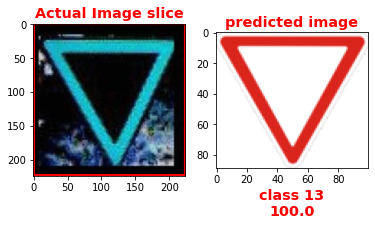

(224, 224, 3)
1/1 [==============================] - 1s 557ms/step
23
max prob =  1.0


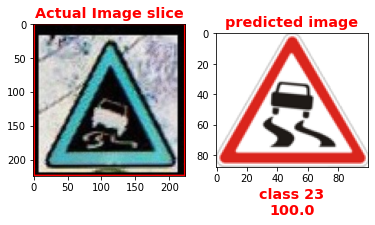

(224, 224, 3)
1/1 [==============================] - 0s 405ms/step
4
max prob =  1.0


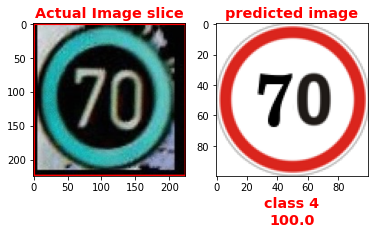

(224, 224, 3)
1/1 [==============================] - 0s 394ms/step
11
max prob =  1.0


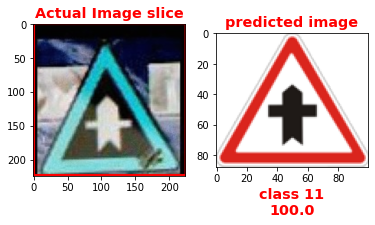

(224, 224, 3)
1/1 [==============================] - 1s 538ms/step
14
max prob =  1.0


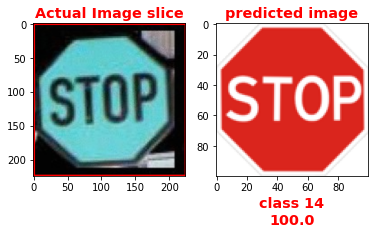

(224, 224, 3)
1/1 [==============================] - 1s 559ms/step
25
max prob =  1.0


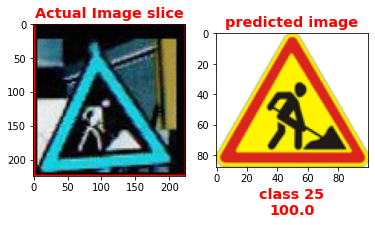

(224, 224, 3)
1/1 [==============================] - 0s 496ms/step
16
max prob =  1.0


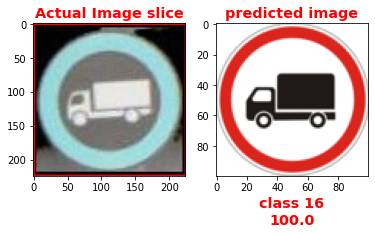

(224, 224, 3)
1/1 [==============================] - 1s 621ms/step
40
max prob =  1.0


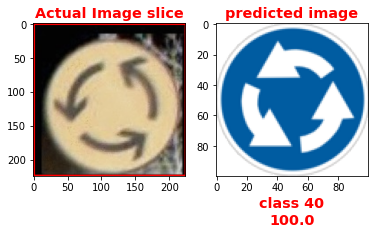

(224, 224, 3)
1/1 [==============================] - 1s 556ms/step
18
max prob =  1.0


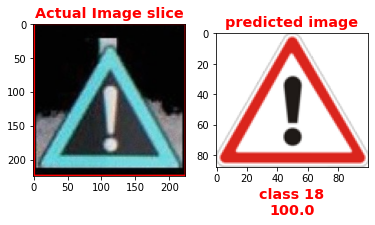

(224, 224, 3)
1/1 [==============================] - 0s 403ms/step
33
max prob =  1.0


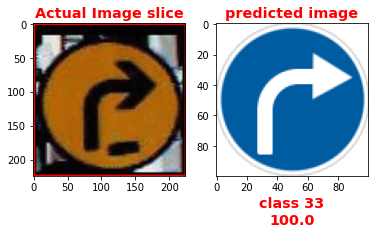

(224, 224, 3)
1/1 [==============================] - 0s 444ms/step
12
max prob =  1.0


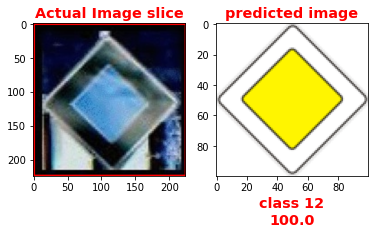

(224, 224, 3)
1/1 [==============================] - 1s 540ms/step
41
max prob =  1.0


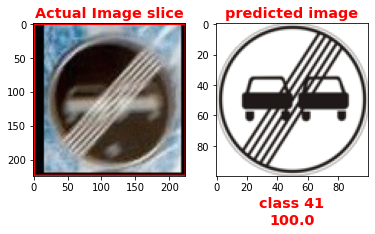

(224, 224, 3)
1/1 [==============================] - 1s 521ms/step
21
max prob =  1.0


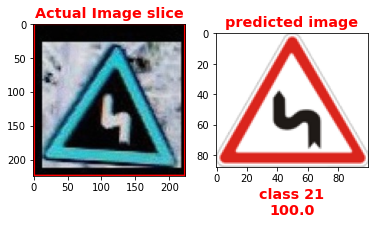

(224, 224, 3)
1/1 [==============================] - 1s 503ms/step
39
max prob =  1.0


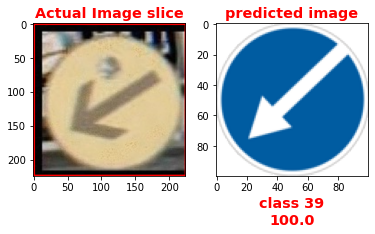

CPU times: user 25.3 s, sys: 1.64 s, total: 26.9 s
Wall time: 18.4 s


In [301]:
%%time
# sample_img = Image.open('../data/test_imgs/test_img2.jpg')
# sample_img = sample_img.resize((224, 224))
# sample_img = np.array(sample_img)
#
# plt.imshow(sample_img)
obj_coods = []
obj_label = []
for i in range(len(slices)):
    for j in range(len(slices[i])):
        # print(np.array(slices[i][j]).shape)
        cood_, label_ = test(slices[i][j])
        obj_label.append(label_)
        obj_coods.append(cood_)